In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import joblib

In [38]:
df = pd.read_csv('properties_preprocessed_df.csv')
df.head()

,Property_Type,Bed,Bath,Parking,Postcode,Suburb,Price
0,Apartment/House,2,2,0,2000,SYDNEY,1250.0
1,Apartment/House,1,1,0,2000,SYDNEY,850.0
2,Apartment/House,1,1,1,2000,SYDNEY,800.0
3,Apartment/House,1,1,0,2000,SYDNEY,850.0
4,Apartment/House,1,1,1,2000,SYDNEY,1200.0


In [39]:
def get_predictors(df,predictor_variables = ['Bed','Bath','Parking','Postcode','Property_Type']):
    #dataframe of predictor variables
    X = df[predictor_variables]
    #one-hot encode non-numeric variables
    X = pd.get_dummies(data=X, drop_first=True,dtype=int)
    return X
    

In [40]:
X = get_predictors(df)
X.head()

,Bed,Bath,Parking,Postcode_2007_2010_2011,Postcode_2009,Property_Type_Studio
0,2,2,0,0,0,0
1,1,1,0,0,0,0
2,1,1,1,0,0,0
3,1,1,0,0,0,0
4,1,1,1,0,0,0


In [41]:
Y = df['Price'] #target variable

#split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

#add a constant column to predictor variables
X_train_Sm= sm.add_constant(X_train)

#perform ordinary least squares regression with statsmodel and view summary
ls=sm.OLS(Y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     173.9
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          4.17e-115
Time:                        10:44:02   Log-Likelihood:                -3291.3
No. Observations:                 469   AIC:                             6597.
Df Residuals:                     462   BIC:                             6626.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [42]:
#create predictive linear regression model using sklearn.linear_model
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [43]:
# Make predictions on the test set
Y_pred = model.predict(X_test)

In [44]:
# Calculate evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 69764.95752235594
R-squared (R2): 0.6808297890234769


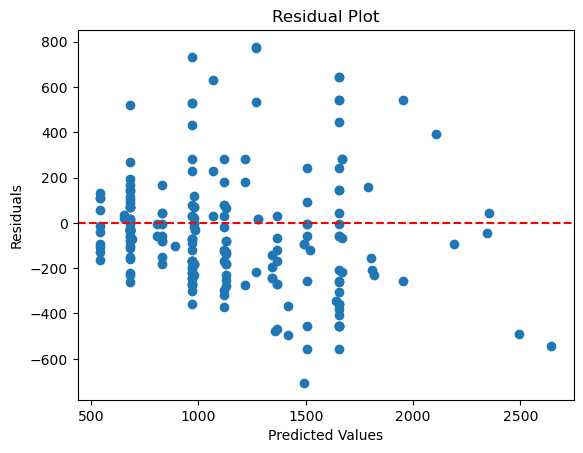

In [45]:
# Calculate the residuals
residuals = Y_test - Y_pred

# Plot the residuals
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [46]:
# save the model to disk
#filename = 'regression_model'
#joblib.dump(model, filename)